<a href="https://colab.research.google.com/github/Aleena24/CaseStudy_Project/blob/main/caseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Kaggle Configurations

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d bhavikjikadara/e-commerce-products-images


 99% 279M/283M [00:09<00:00, 36.3MB/s]
100% 283M/283M [00:09<00:00, 32.0MB/s]


In [7]:
!unzip /content/e-commerce-products-images.zip -d /content/e-commerce-products-images


Streaming output truncated to the last 5000 lines.
  inflating: /content/e-commerce-products-images/e-commerce/images/58129.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/5813.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58131.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58132.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58133.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58135.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58136.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58137.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58138.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58139.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/5814.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58140.jpg  
  i

In [8]:
!ls /content/e-commerce-products-images/

e-commerce  styles.csv


# Dataset Import

In [6]:
import os
import pandas as pd

df = pd.read_csv('/content/e-commerce-products-images/styles.csv')

image_dir = '/content/e-commerce-products-images/e-commerce/images/'

# Get a list of all filenames in the image directory
all_image_filenames = os.listdir(image_dir)

# Extract the filenames without the ".jpg" extension
image_ids_to_keep = [filename.replace('.jpg', '') for filename in all_image_filenames]

# Filter the DataFrame to keep only rows with IDs present in image_ids_to_keep
df_filtered = df[df['id'].astype(str).isin(image_ids_to_keep)]

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('/content/e-commerce-products-images/styles_filtered.csv', index=False)


In [7]:
import os
from PIL import Image
import random

def count_total_images(image_dir, image_paths):
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
    total_images = sum(1 for image_id in image_paths if f"{image_id}.jpg" in image_files)
    return total_images

total_images_count = count_total_images(image_dir, df['id'])
print(f"Total number of images: {total_images_count}")

num_columns = df_filtered.shape[1]
print(f"Number of columns: {num_columns}")

num_data_points = df_filtered.shape[0]
print(f"Total number of data points: {num_data_points}")

Total number of images: 1000
Number of columns: 10
Total number of data points: 1000


In [8]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


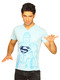

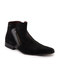

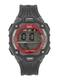

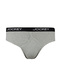

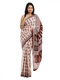

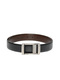

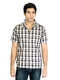

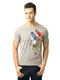

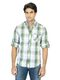

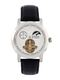

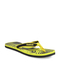

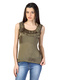

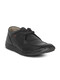

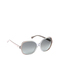

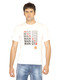

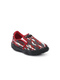

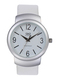

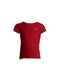

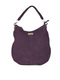

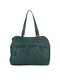

In [9]:
from IPython.display import display, Image as IPImage

def display_random_images(image_dir, df, num_images=20):
    random_sample_ids = random.sample(df['id'].tolist(), num_images)

    for image_id in random_sample_ids:
        image_path = os.path.join(image_dir, f"{image_id}.jpg")
        display(IPImage(filename=image_path))
display_random_images(image_dir, df_filtered)


# Histogram for product categories

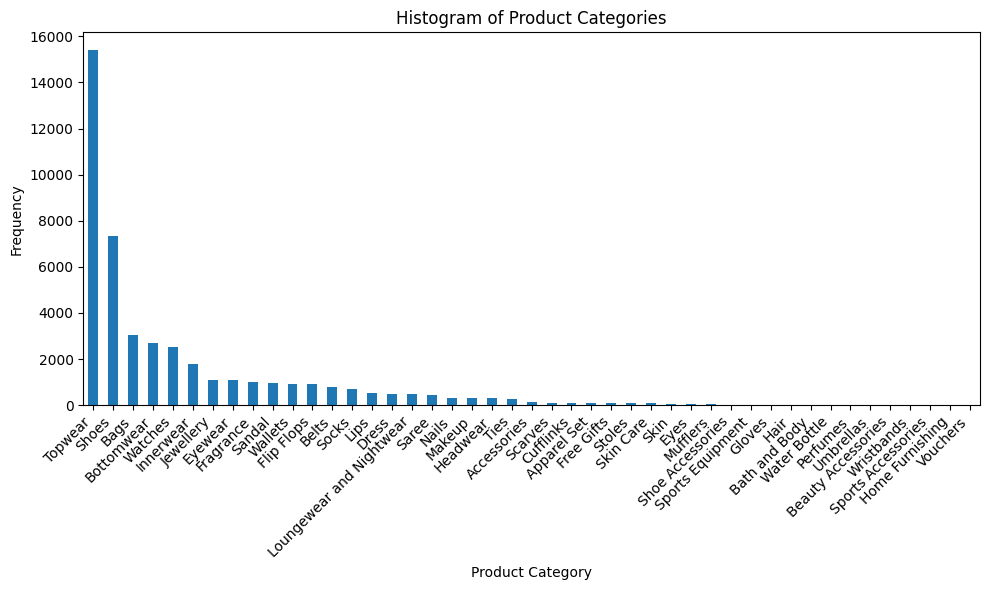

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['subCategory'].value_counts().plot(kind='bar')
plt.title('Histogram of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Pie Chart Gender


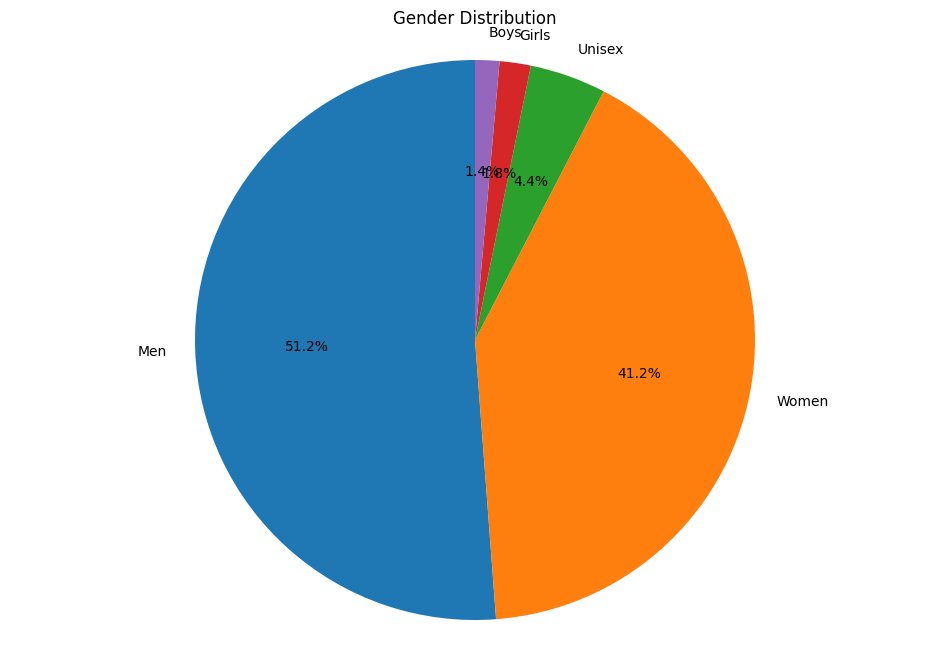

In [11]:
df_filtered = df_filtered.dropna(subset=['gender'])

gender_counts = df_filtered['gender'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


# Dataset Preprocessing

In [12]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenization

In [14]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(filtered_tokens)

Stopwords Removal

In [15]:
def preprocess_text(text):
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        return ' '.join(filtered_tokens)
    else:
        return ''

In [16]:
df_filtered['atp'] = df_filtered['articleType'].apply(preprocess_text)
df_filtered['pdn'] = df_filtered['productDisplayName'].apply(preprocess_text)

# Image Preprocessing

Image Resizing and Normalization

In [45]:
import os
import cv2
from torchvision import transforms
from PIL import Image
import numpy as np

In [19]:
def preprocess_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    return img

In [20]:
processed_images = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        img_path = os.path.join(image_dir, filename)
        processed_img = preprocess_image(img_path)
        processed_images.append(processed_img)

In [53]:
image = Image.open(image_path)

if image.mode != 'RGB':
    image = image.convert('RGB')

In [55]:
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
    image = preprocess(image)

In [57]:
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    image = normalize(image)

In [58]:
image = torch.unsqueeze(image, 0)

# Feature Extraction

# Bert Model

In [80]:
!pip install transformers gensim

In [21]:
import os
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

In [35]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

In [33]:
max_len = 10

tokenized_texts = [tokenizer.tokenize(str(text))[:max_len] for text in df_filtered['productDisplayName']]
input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]

input_ids = [ids + [tokenizer.pad_token_id] * (max_len - len(ids)) if len(ids) < max_len else ids[:max_len] for ids in input_ids]

input_ids = torch.tensor(input_ids)

model_bert.eval()

with torch.no_grad():
    outputs = model_bert(input_ids)

features = outputs.last_hidden_state[:, 0, :].numpy()

# CNN (ResNet)

In [36]:
import torch
from torchvision import models, transforms
from PIL import Image
import pandas as pd

In [39]:
model_res = models.resnet50(pretrained=True)
model_res.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [40]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [42]:
def extract_features(image_path):
    image = Image.open(image_path)
    image = preprocess(image)
    image = torch.unsqueeze(image, 0)
    with torch.no_grad():
        features = model_res(image)
    return features[0].numpy()

In [60]:
features_list = []

In [61]:
for filename in all_image_filenames:
    image_path = os.path.join(image_dir, filename)
    features = extract_features(image_path)
    features_list.append(features)

In [62]:
features_df = pd.DataFrame(features_list)
features_df.to_csv('/content/e-commerce-products-images/image_features.csv', index=False)

# Multimodal Fusion

In [ ]:
multimodal_features = np.concatenate((textual_features, visual_features), axis=1)

In [ ]:
# Assuming textual_features and visual_features have the same shape
multimodal_features = textual_features * visual_features


In [ ]:
from tensorflow.keras.layers import Concatenate, Dense, Dot, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Assuming textual_features and visual_features have been extracted

# Define attention mechanism
attention = Dot(axes=[1, 1])([textual_features, visual_features])
attention = Activation('softmax')(attention)
attended_visual_features = Dot(axes=[1, 1])([attention, visual_features])

# Concatenate attended_visual_features with textual_features
fusion_features = Concatenate()([textual_features, attended_visual_features])

# Optional: Add more layers for further processing
fusion_features = Dense(128, activation='relu')(fusion_features)
output_layer = Dense(1, activation='sigmoid')(fusion_features)  # Binary classification example, adjust output layer accordingly

# Create a model for multimodal fusion
multimodal_model = Model(inputs=[textual_input, visual_input], outputs=output_layer)

# Compile the model with optimizer, loss function, and accuracy metric
multimodal_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have training and validation data
train_data = ...  # Your training data
validation_data = ...  # Your validation data

# Train the model
multimodal_model.fit(train_data, epochs=10, validation_data=validation_data)

# Evaluate accuracy on a separate test set
test_data = ...  # Your test data
loss, accuracy = multimodal_model.evaluate(test_data)
print("Test Accuracy:", accuracy)

# Recommendation Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Concatenate

# Assuming you have multimodal features concatenated as input_features and target labels as target_labels

# Define the model architecture
recommendation_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_features.shape[1],)),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer (binary classification, adjust for your task)
])

# Compile the model
recommendation_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with your data
history = recommendation_model.fit(input_features, target_labels, epochs=10, validation_split=0.2)

# Evaluate the model on a separate test set
test_loss, test_accuracy = recommendation_model.evaluate(test_input_features, test_target_labels)

# Print test accuracy
print("Test Accuracy:", test_accuracy)
